In [1]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
import argparse

In [2]:
def preprocess(data_name):
  src_list, dst_list, ts_list = [], [], []

  with open(data_name) as f:
    for idx, line in enumerate(f):
      e = line.strip().split(' ')
      src = int(e[0])
      dst = int(e[1])

      ts = float(e[2])

      src_list.append(src)
      dst_list.append(dst)
      ts_list.append(ts)

  return pd.DataFrame({'src': src_list,
                       'dst': dst_list,
                       'ts': ts_list})

In [3]:
data_name = "sx-stackoverflow"
PATH = './data/{}.txt'.format(data_name)
OUT_DF = './data/ml_{}.csv'.format(data_name)

#df = preprocess(PATH)

In [4]:
df = pd.read_csv('./data/ml_{}.csv'.format(data_name))

In [5]:
df

,Unnamed: 0,src,dst,ts
0,0,9,8,1.217568e+09
1,1,1,1,1.217574e+09
2,2,13,1,1.217606e+09
3,3,17,1,1.217618e+09
4,4,48,2,1.217618e+09
...,...,...,...,...
63497045,63497045,4049257,3816212,1.457273e+09
63497046,63497046,3507137,1801524,1.457273e+09
63497047,63497047,144088,275047,1.457273e+09
63497048,63497048,5617035,4368648,1.457273e+09


In [6]:
df_group = df.groupby('dst').agg({'ts':lambda x: list(x)})
df_group

,ts
dst,
1,"[1217573801.0, 1217606247.0, 1217617639.0, 121..."
2,"[1217618182.0, 1217625055.0, 1217714233.0, 121..."
3,"[1226725170.0, 1231933265.0, 1231937597.0, 123..."
4,"[1221494273.0, 1221906984.0, 1221908021.0, 122..."
5,"[1218160607.0, 1218160858.0, 1218160865.0, 121..."
...,...
6024256,"[1457266570.0, 1457266693.0, 1457266782.0]"
6024257,"[1457271570.0, 1457272980.0]"
6024258,"[1457266362.0, 1457266678.0, 1457266762.0, 145..."


In [7]:
df_group['diff'] = df_group.apply(lambda row: np.diff(sorted(row['ts'])), axis=1)

Text(0.5, 1.0, 'Time difference between single dest node')

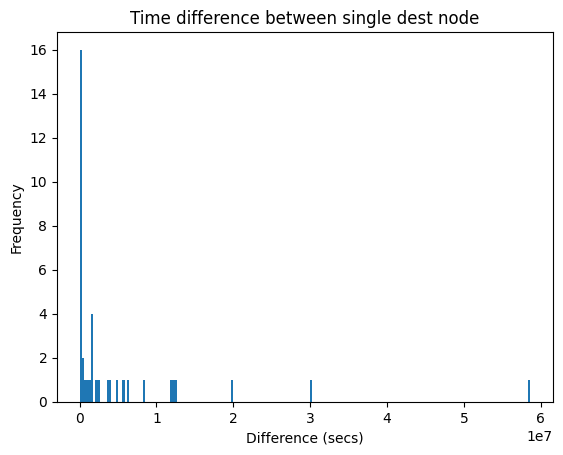

In [9]:
import matplotlib.pyplot as plt
plt.hist(df_group['diff'].iloc[1], bins=200)
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between single dest node")

In [10]:
all = np.hstack(df_group['diff'])

In [11]:
# Filter out time different greater than 2 weeks
filter_arr = all[all < 1209600]
len(filter_arr)

In [13]:
len(all)

61200384

In [24]:
counts, bin_edges = np.histogram(filter_arr, bins=4000)
print(counts)
print(bin_edges)

[58607140   695455   357559 ...        1        0        1]
[0.000000e+00 2.159000e+00 4.318000e+00 ... 8.631682e+03 8.633841e+03
 8.636000e+03]


In [38]:
df_describe = pd.DataFrame(all)
df_describe.describe()

,0
count,6.120038e+07
mean,3.813114e+00
std,6.408714e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.975180e+06


Text(0.5, 1.0, 'Time difference between interaction of destination nodes')

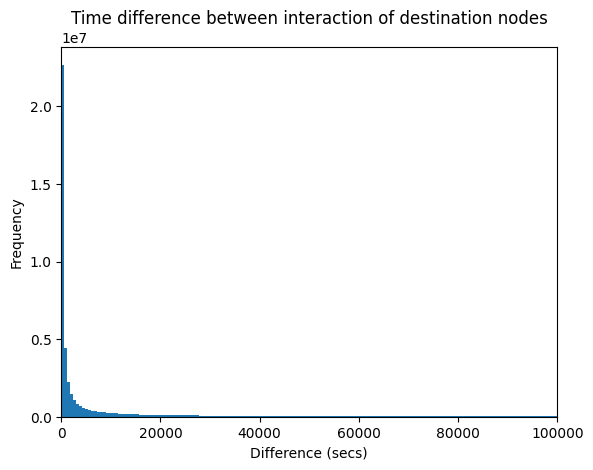

In [15]:
plt.hist(filter_arr, bins=2000)
plt.xlim(0,100000)
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between interaction of destination nodes")

Text(0.5, 1.0, 'Time difference between interaction in 1000 destination nodes')

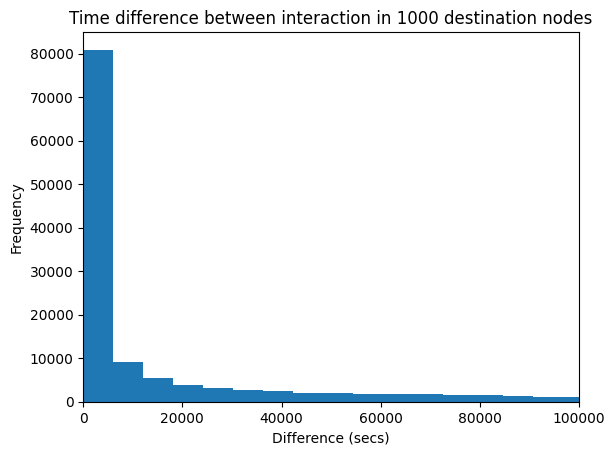

In [42]:
all_10k = np.hstack(df_group['diff'].loc[:1000])
all_10k = all_10k[all_10k < 1209600]
plt.hist(all_10k, bins=200)
plt.xlim(0,100000)
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between interaction in 1000 destination nodes")


In [28]:
len(all_10k)

186552

In [27]:
df_group['diff'].loc[:1000]

dst
1       [32446.0, 11392.0, 600.0, 34133.0, 231074.0, 1...
2       [6873.0, 89178.0, 140848.0, 335.0, 1764.0, 365...
3       [957426.0, 10159.0, 143352.0, 140805.0, 403749...
4       [1693079.0, 423374.0, 91914.0, 122454.0, 19834...
5       [251.0, 7.0, 55.0, 680679.0, 277971.0, 151.0, ...
                              ...                        
996     [265.0, 371.0, 461.0, 540.0, 296151.0, 2126.0,...
997     [2242.0, 1195905.0, 877.0, 670.0, 2928791.0, 9...
998     [616.0, 2351.0, 65842.0, 598.0, 2382.0, 116832...
999     [7390.0, 623.0, 2390458.0, 564.0, 164487.0, 78...
1000    [242.0, 1.0, 4033.0, 4376.0, 544.0, 79385.0, 3...
Name: diff, Length: 727, dtype: object

In [93]:
import os
import pandas as pd
import os.path as osp
from overflowDataset import OverFlowDataset
from torch_geometric.datasets import JODIEDataset
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_undirected

__file__ = os.path.abspath('')
path = osp.join(osp.dirname(osp.realpath(__file__)), '..', 'data', 'OpenFlow')

dataName = 'taobao'

if dataName == 'overflow':
    path = '/mnt/raid0nvme1/zz/data/' + 'overflow'
    dataset = OverFlowDataset(path)
    data = dataset[0]
    orig_edge_index = data.edge_index
elif dataName == 'taobao':
    path = '/mnt/raid0nvme1/zz/data/' + 'taobao/taobao.pt'
    data = torch.load(path)
    orig_edge_index = data.edge_index
    data.edge_index = to_undirected(data.edge_index)
elif dataName == 'reddit':
    path = '/mnt/raid0nvme1/zz/data/' + 'JODIE'
    dataset = JODIEDataset(path, name='reddit')
    data_orig = dataset[0]
    data = Data(x=data_orig.msg, edge_index=torch.stack([data_orig.src, data_orig.dst], dim=0), edge_attr=data_orig.t)
    orig_edge_index = data.edge_index
    data.edge_index = to_undirected(data.edge_index)
elif dataName == 'wiki':
    path = '/mnt/raid0nvme1/zz/data/' + 'JODIE'
    dataset = JODIEDataset(path, name='wikipedia')
    data_orig = dataset[0]
    data = Data(x=data_orig.msg, edge_index=torch.stack([data_orig.src, data_orig.dst], dim=0), edge_attr=data_orig.t)
    orig_edge_index = data.edge_index
    data.edge_index = to_undirected(data.edge_index)

In [94]:
# Construct df
d = {'src': orig_edge_index[0].numpy(), 'dst': orig_edge_index[1].numpy(), 'ts': data.edge_attr.numpy()}
df = pd.DataFrame(data=d)
df

,src,dst,ts
0,796351,4879572,259
1,933258,3311003,7864
2,406423,1325095,11337
3,406423,2976586,11831
4,406423,2521556,12935
...,...,...,...
100150484,56269,2814443,2108304337
100150485,56269,5137372,2108304348
100150486,56269,1527484,2108304351
100150487,56269,2813246,2108304574


In [95]:
start = 1511539200
end = 1512316799
df = df[(df["ts"] >= start) & (df["ts"] <= end)]

In [70]:
df['ts']

0               0
1              36
2              77
3             131
4             150
           ...   
157469    2678155
157470    2678158
157471    2678293
157472    2678333
157473    2678373
Name: ts, Length: 157474, dtype: int64

In [103]:
# Group by destination node
df_dst = df.groupby('dst').agg({'ts':lambda x: list(x)})
df_src = df.groupby('src').agg({'ts':lambda x: list(x)})

In [105]:
df_dst['diff'] = df_dst.apply(lambda row: np.diff(sorted(row['ts'])), axis=1)
df_src['diff'] = df_src.apply(lambda row: np.diff(sorted(row['ts'])), axis=1)

In [107]:
df_dst = df_dst[df_dst['diff'].map(lambda d: len(d)) > 0]
df_src = df_src[df_src['diff'].map(lambda d: len(d)) > 0]

In [104]:
df_dst

,ts
dst,
987994,"[1511639146, 1511940737]"
987995,"[1511625476, 1511873042]"
987996,"[1511569547, 1511593206, 1511612256]"
987997,"[1511831182, 1512275876]"
987998,[1511673523]
...,...
5150011,"[1511589623, 1511672697]"
5150012,"[1511574960, 1511622456, 1511685821, 151176376..."
5150013,"[1511752061, 1511959993, 1511974991, 1512049264]"


In [109]:
df_dst['diff_avg'] = df_dst.apply(lambda row: np.mean(row['diff']), axis=1)
df_src['diff_avg'] = df_src.apply(lambda row: np.mean(row['diff']), axis=1)

/tmp/ipykernel_591333/715503086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dst['diff_avg'] = df_dst.apply(lambda row: np.mean(row['diff']), axis=1)


Text(0.5, 1.0, 'Average time difference between requests for a destination node')

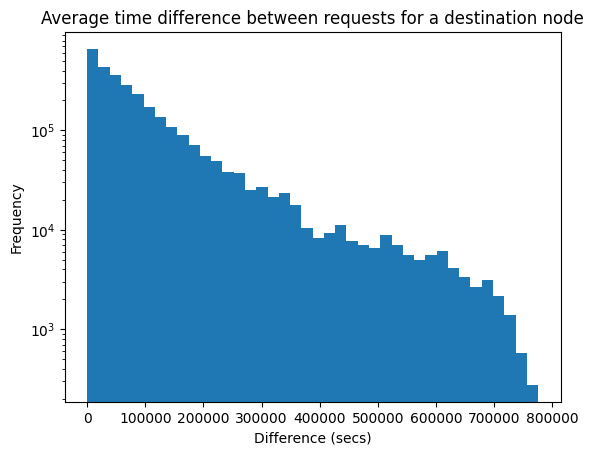

In [113]:
x = df_dst['diff_avg']
averages = x[~np.isnan(x)]

plt.hist(averages, bins=40)
#plt.xlim(0,800000)
plt.yscale('log')
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Average time difference between requests for a destination node")

In [114]:
df_describe = pd.DataFrame(averages)
df_describe.describe()

,diff_avg
count,2.954237e+06
mean,9.819905e+04
std,1.157575e+05
min,0.000000e+00
25%,2.267237e+04
50%,5.972189e+04
75%,1.268595e+05
max,7.759440e+05


In [125]:
print(len(df_dst))
print(len(df_dst[df_dst['diff'].map(len) > 100]))

long_df_dst = df_dst[df_dst['diff'].map(len) > 50]


2954237
180694


In [136]:
y = long_df_dst.iloc[3]['diff']

In [137]:
df_describe = pd.DataFrame(y)
df_describe.describe()

,0
count,99.000000
mean,7831.737374
std,11615.392179
min,8.000000
25%,650.500000
50%,3132.000000
75%,8577.000000
max,51510.000000


In [135]:
(3715.432)/2439.154

1.5232461746982764

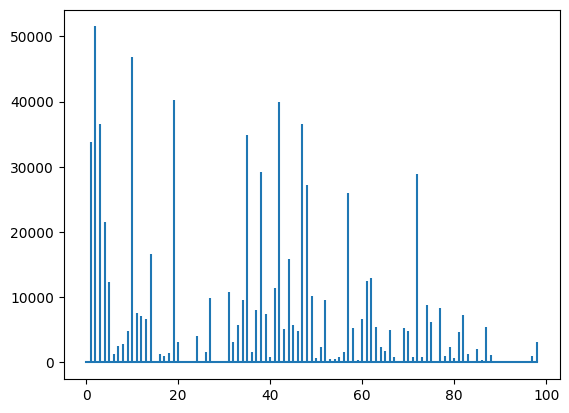

In [138]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(y))

fig, ax = plt.subplots()
ax.stem(x, y, markerfmt=' ', basefmt= 'C0')
plt.show()

In [43]:
dst_all = np.hstack(df_dst['diff'])
# Filter out time different greater than 2 weeks
dst_all = dst_all[dst_all < 1209600]
src_all = np.hstack(df_src['diff'])
src_all = src_all[src_all < 1209600]

In [98]:
len(df_dst['diff'])

4161138

In [116]:

df_describe = pd.DataFrame(dst_all)
df_describe.describe()

,0
count,9.593409e+07
mean,1.484467e+04
std,4.645794e+04
min,0.000000e+00
25%,2.440000e+02
50%,1.259000e+03
75%,7.088000e+03
max,7.759440e+05


Text(0, 0.5, 'Frequency')

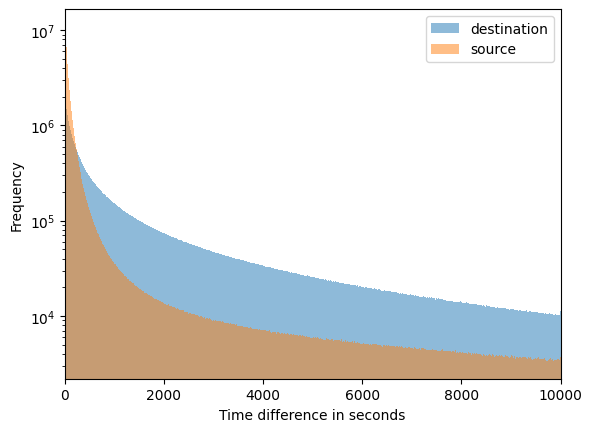

In [184]:
plt.hist(dst_all, bins=1000, alpha=0.5, label='destination', range=(0,10000))
plt.hist(src_all, bins=1000, alpha=0.5, label='source', range=(0,10000))
plt.xlim(0,10000)
plt.yscale('log')
plt.xlabel("Time difference in seconds")
plt.legend(loc='upper right')
plt.ylabel("Frequency")
#plt.title("Time difference between interaction of destination nodes")

In [ ]:
# Based on this how can we be sure that there is in fact a correlation between the occurance of a request and 

In [165]:
df_dst['diff_len'] = df_dst.apply(lambda row: len(row['diff']), axis=1)
df_src['diff_len'] = df_src.apply(lambda row: len(row['ts']), axis=1)

/tmp/ipykernel_591333/1884641286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dst['diff_len'] = df_dst.apply(lambda row: len(row['diff']), axis=1)


In [168]:
dst_len_all = np.hstack(df_dst['diff_len'])
src_len_all = np.hstack(df_src['diff_len'])

Text(0, 0.5, 'Frequency')

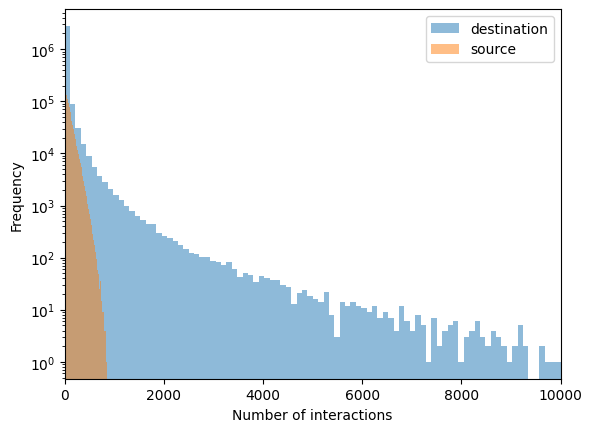

In [176]:
plt.hist(dst_len_all, bins=300, alpha=0.5, label='destination')
plt.hist(src_len_all, bins=50, alpha=0.5, label='source')
plt.xlim(0,10000)
plt.yscale('log')
plt.xlabel("Number of interactions")
plt.legend(loc='upper right')
plt.ylabel("Frequency")
#plt.title("Time difference between interaction of destination nodes")

Text(0.5, 1.0, 'Time difference between interaction of destination nodes')

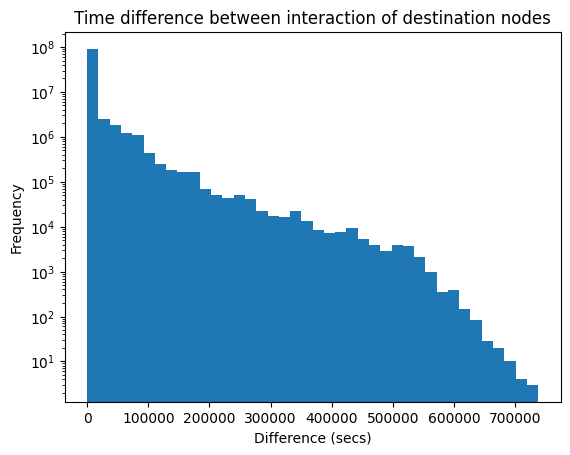

In [80]:
plt.hist(src_all, bins=40)
#plt.xlim(0,800000)
plt.yscale('log')
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between interaction of destination nodes")

Text(0.5, 1.0, 'Time difference between interaction of destination nodes')

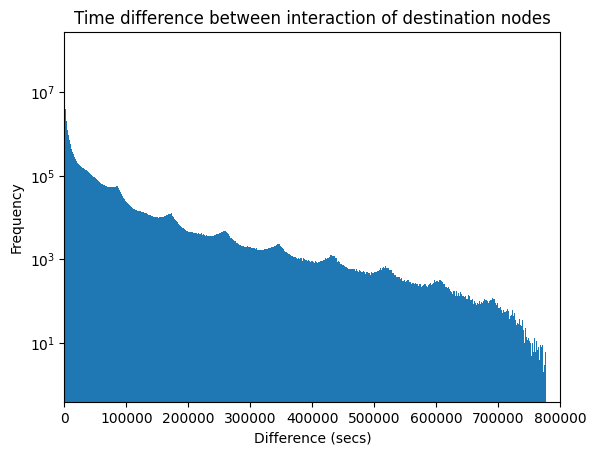

In [51]:
plt.hist(np.concatenate((dst_all, src_all)), bins=2000)
plt.xlim(0,800000)
plt.yscale('log')
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between interaction of destination nodes")

/tmp/ipykernel_591333/1236275552.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Date of interactions')

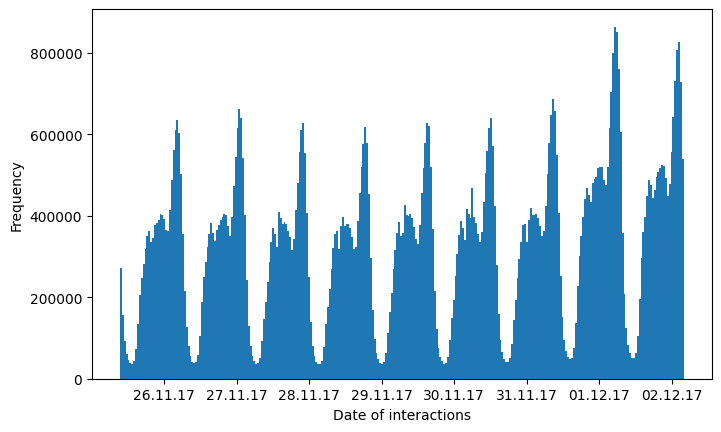

In [156]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

plt.hist(df['ts'], bins=300)
#plt.yscale('log')
labels = ['25.11.17', '26.11.17', '27.11.17', '28.11.17', '29.11.17', '30.11.17', '31.11.17', '01.12.17', '02.12.17']

ax.set_xticklabels(labels)
fig.set_figwidth(8)
plt.ylabel("Frequency")
plt.xlabel("Date of interactions")
#labels=[1,2,3,4,5,6,7,8]
#plt.xticks(np.arange(-3, 3, 0.5))